In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from scipy.stats import pearsonr


In [3]:
df =  pd.read_csv('winequality-red.csv')

# DATA EXPLORATION

In [4]:
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,1.0,3.3,0.7,10.4,5.6
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,10.2,6.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,1.0,4.0,2.0,14.9,8.0


In [8]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [9]:
# Classes

classes = df['quality'].unique()

<AxesSubplot:>

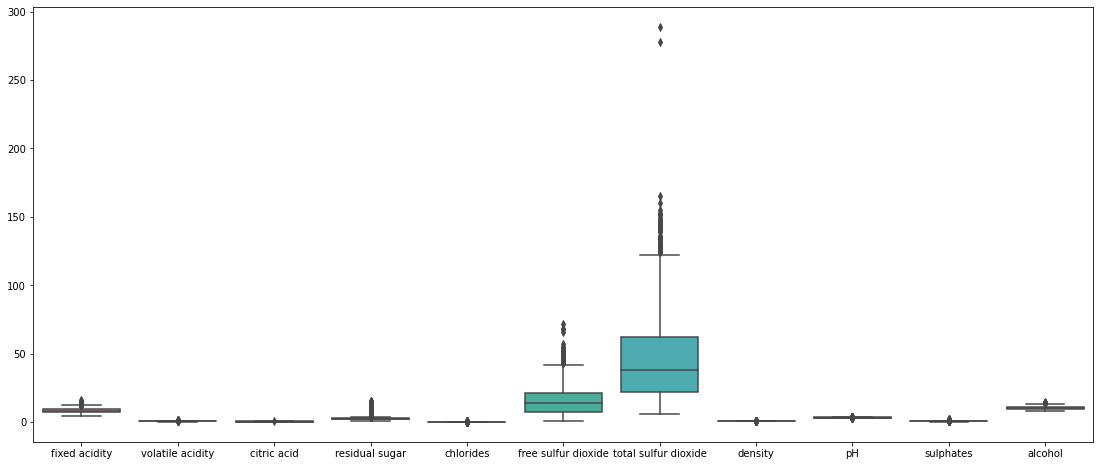

In [10]:
x_variables = df.iloc[:,:-1]

plt.figure(figsize=(19,8))
sns.boxplot(data=x_variables)

* Total Sulfur Dioxide has the highest amount of outliers and its scale is different than the other variables in dataset

In [12]:
for i in x_variables:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


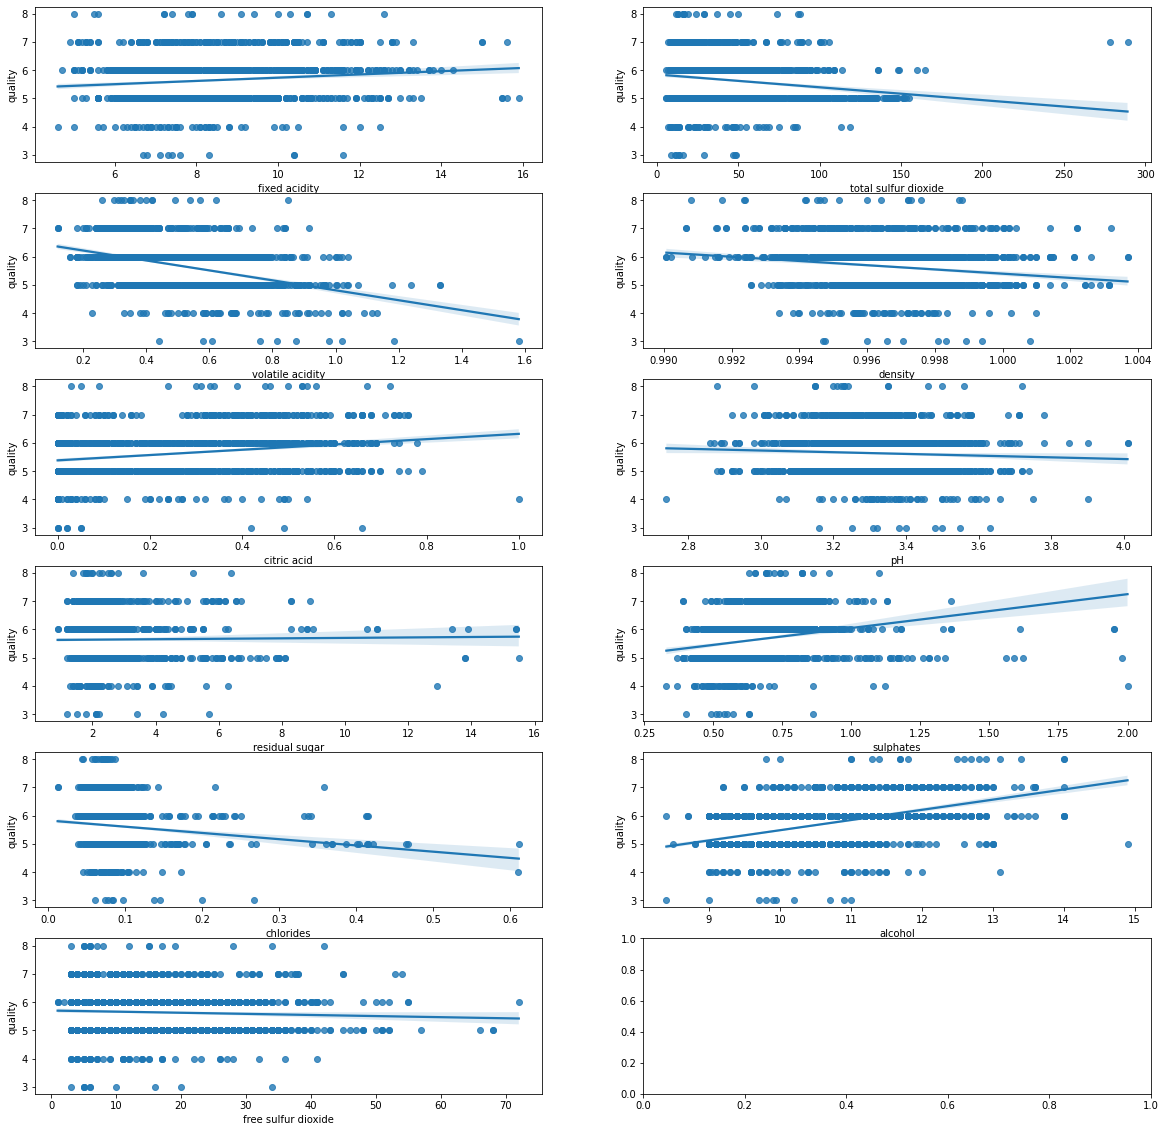

In [11]:
# CREATING SUBPLOT FOR 11 REGRESSION PLOTS
fig, axes = plt.subplots(6,2, figsize=(20,20))

# ROW COUNTER
counter = 0

#COLUMN COUNTER
counter2 = 0

#ITERATING THROUGH THE INDEPENDENT VARIABLES TO CREATE ONE PLOT FOR EACH 
for column in x_variables:

    sns.regplot(x=df[column], y=df['quality'], ax = axes[counter][counter2])
    counter +=1

    if counter > 5:
        counter2 = 1
        counter = 0


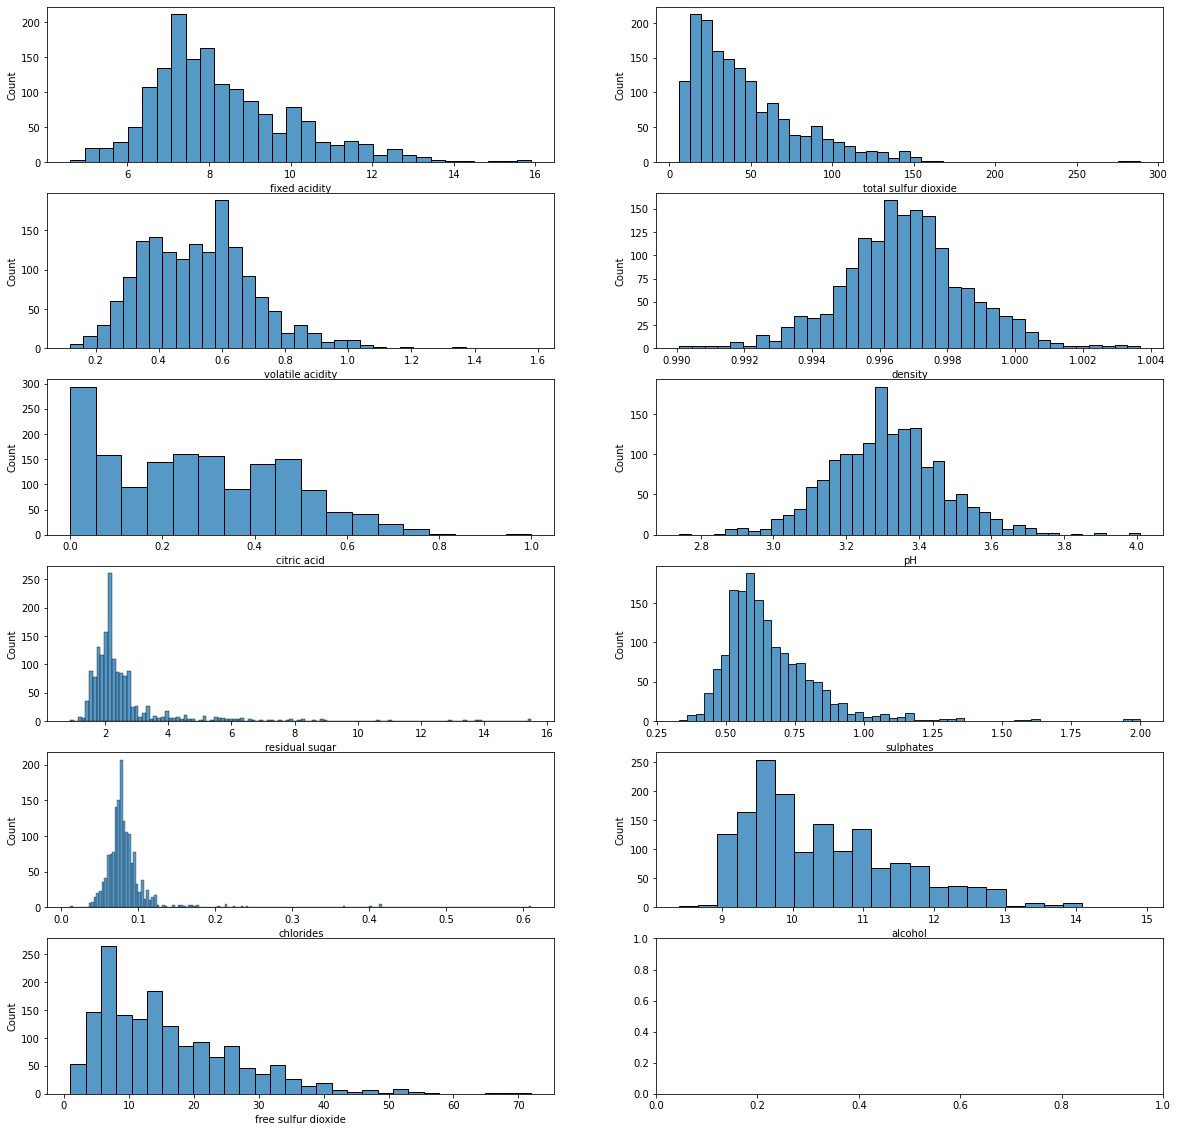

In [68]:
# CREATING SUBPLOT FOR 11 HISTOGRAMS
fig, axes = plt.subplots(6,2, figsize=(20,20))

# ROW COUNTER
counter = 0

#COLUMN COUNTER
counter2 = 0

#ITERATING THROUGH THE INDEPENDENT VARIABLES TO CREATE ONE PLOT FOR EACH 
for column in df.iloc[:,:-1]:

    sns.histplot(x=df[column], ax = axes[counter][counter2])
    counter +=1

    if counter > 5:
        counter2 = 1
        counter = 0
        

In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

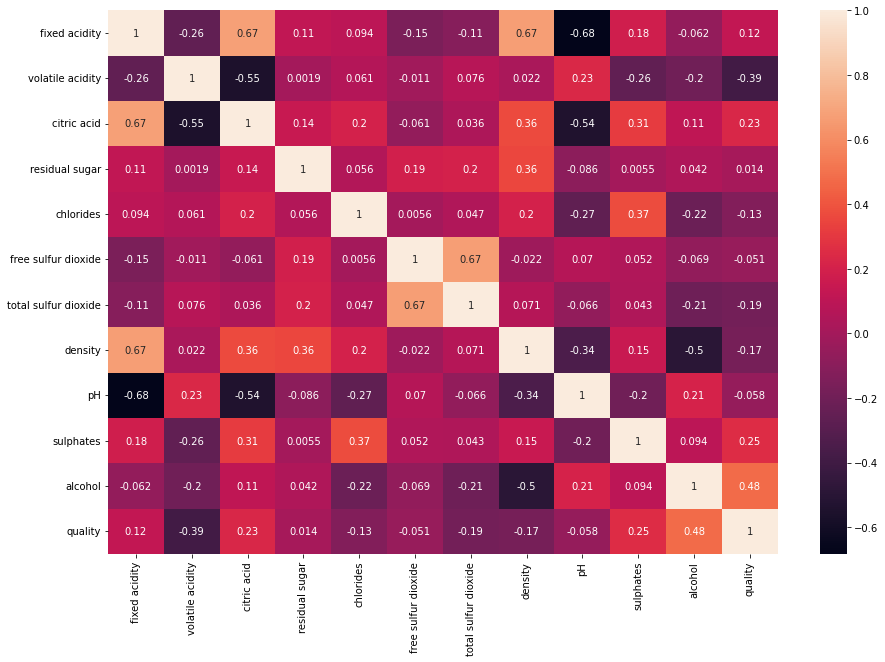

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Variables that seem too correlated:

* citric acid & volatile acid
* ph & fixed acidity
* citric acid & ph
* citric acid & fixed acidity

In [13]:
x_variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# CREATING THE MODEL

In [14]:
# SEPARATING DATA IN DEPENDENT AND INDEPENDENT VARIABLES

y_original = df['quality']

# DROPPING TOTAL SULFUR DIOXIDE
x_original = df.drop(['quality', 'total sulfur dioxide'], axis=1)
x_variables = x_variables.drop('total sulfur dioxide', axis = 1)

In [15]:
x_train, x_test, y_train, y_test =  train_test_split(x_variables,df['quality'], test_size=0.25)

In [16]:
#Creating Decidion Tree Classifier

decision_classifier = DecisionTreeClassifier(criterion='gini', random_state=130, max_depth=10)

decision_classifier = decision_classifier.fit(X=x_train, y=y_train)

#Predicting results from Test Data

prediction1 = decision_classifier.predict(x_test)

#Getting accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, prediction1)

0.56

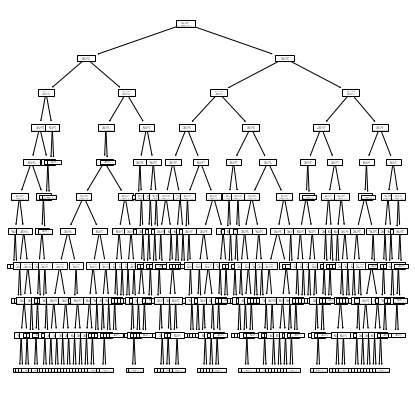

In [17]:
#Plotting Tree:
plt.figure(figsize=(7,7))
plot_tree(decision_classifier)

plt.show()

In [18]:
decision_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 130,
 'splitter': 'best'}

### TRYING RANDOM FORESTS

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
#Creating Random Forest Classifier and fitting data
rfc = RandomForestClassifier(criterion = 'gini', )
rfc = rfc.fit(X=x_train, y=y_train)

#Predicting data from Test, Train and Original DFs
rfc_prediction_test = rfc.predict(x_test)
rfc_prediction_origional = rfc.predict(x_original)
rfc_prediction_train = rfc.predict(x_train)

#Getting Accuracy Score from each prediction
accuracy_test = accuracy_score(y_test, rfc_prediction_test)
accuracy_train = accuracy_score(y_train, rfc_prediction_train)
accuracy_original = accuracy_score(y_original, rfc_prediction_origional)

print('Accuracy Test Data = ', accuracy_test)
print('Accuracy Train Data = ', accuracy_train)
print('Accuracy Original Data = ', accuracy_original)

Accuracy Test Data =  0.6975
Accuracy Train Data =  1.0
Accuracy Original Data =  0.9243277048155097


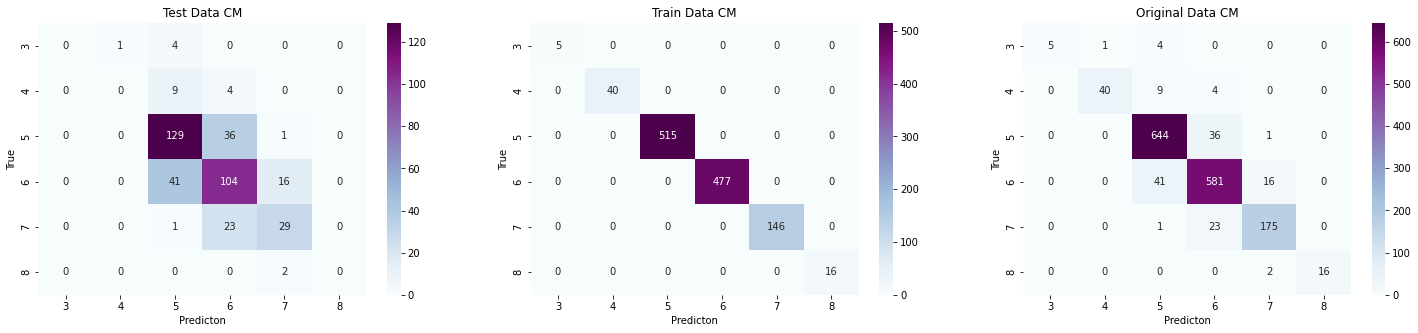

In [21]:
#Confusion Matrix
fig, axes = plt.subplots(ncols=3, figsize=(25, 5))

confusion_matrix_test = confusion_matrix(y_test, rfc_prediction_test)
confusion_matrix_train = confusion_matrix(y_train, rfc_prediction_train)
confusion_matrix_original = confusion_matrix(y_original, rfc_prediction_origional)

cm1 = sns.heatmap(confusion_matrix_test, annot=True, cmap='BuPu', yticklabels=np.arange(6)+3,xticklabels=np.arange(6)+3, ax=axes[0], fmt="d")
cm2 = sns.heatmap(confusion_matrix_train, annot=True, cmap='BuPu', yticklabels=np.arange(6)+3,xticklabels=np.arange(6)+3, ax=axes[1], fmt="d")
cm3 = sns.heatmap(confusion_matrix_original, annot=True, cmap='BuPu', yticklabels=np.arange(6)+3,xticklabels=np.arange(6)+3, ax=axes[2], fmt="d")

cm1.set(xlabel='Predicton', ylabel='True', title='Test Data CM')
cm2.set(xlabel='Predicton', ylabel='True', title='Train Data CM')
cm3.set(xlabel='Predicton', ylabel='True', title='Original Data CM')


plt.show()

In [53]:
#TESTING MODEL WITHOUT FIXED ACIDITY, THAT HAS HIGH CORRELATION WITH OTHER INDEPENDENT VARIABLES
rfc = RandomForestClassifier(criterion = 'gini', )
x_train2 = x_train.drop('fixed acidity', axis=1)
x_test2 = x_test.drop('fixed acidity', axis=1)
x_original2 = x_original.drop('fixed acidity', axis=1)
rfc = rfc.fit(X=x_train2, y=y_train)

rfc_prediction_test = rfc.predict(x_test2)
rfc_prediction_original = rfc.predict(x_original2)
rfc_prediction_train = rfc.predict(x_train2)

accuracy_test = accuracy_score(y_test, rfc_prediction_test)
accuracy_train = accuracy_score(y_train, rfc_prediction_train)
accuracy_original = accuracy_score(y_original, rfc_prediction_origional)

print('Accuracy Test Data = ', accuracy_test)
print('Accuracy Train Data = ', accuracy_train)
print('Accuracy Original Data = ', accuracy_original)

Accuracy Test Data =  0.6875
Accuracy Train Data =  1.0
Accuracy Original Data =  0.9136960600375235
